# Improting Libraries & Data Preperation

## Importing Libraries

In [ ]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
# drive.mount('/content/drive')
import numpy as np
import pandas as  pd
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
import tensorflow.keras as k
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,Bidirectional,Concatenate
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import Adamax, Adam

from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import ParameterGrid

import pickle
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import load_model
from keras.layers import TimeDistributed
%matplotlib inline
%matplotlib inline



## Data Description

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/NLP/aggregated7c.csv',sep=';')

In [ ]:
data.head()

,Polarity,cleaned,Length,source
0,1,this sound track was beautiful it paints the s...,75.0,twitter-train_cleaned
1,1,i am reading a lot of reviews saying that this...,94.0,twitter-train_cleaned
2,1,this soundtrack is my favorite music of all ti...,129.0,twitter-train_cleaned
3,1,i truly like this soundtrack and i enjoy video...,115.0,twitter-train_cleaned
4,1,if you have played the game you know how divin...,79.0,twitter-train_cleaned


In [ ]:
data = data.sample(frac=1,random_state=6400).reset_index(drop=True)
print("Number of Rows:", data.shape[0])
print("Number of columns:", data.shape[1])
data.shape

Number of Rows: 7334528
Number of columns: 4


(7334528, 4)

In [ ]:
data.dropna(axis=0,inplace=True)

In [ ]:
data = data.sample(frac=1,random_state=6400).reset_index(drop=True)
print("Number of Rows after dropping null:", data.shape[0])
print("Number of columns after dropping null:", data.shape[1])
data.shape

Number of Rows after dropping null: 7333767
Number of columns after dropping null: 4


(7333767, 4)

In [ ]:
data.isna().sum()

Polarity    0
cleaned     0
Length      0
source      0
dtype: int64

In [ ]:
#Selecting only data with less than 150 word length
data=data[data['Length']<=150]
data.describe()

,Polarity,Length
count,6.953027e+06,6.953027e+06
mean,5.784942e-01,4.503879e+01
std,4.938003e-01,3.832743e+01
min,0.000000e+00,1.000000e+00
25%,0.000000e+00,1.500000e+01
50%,1.000000e+00,3.100000e+01
75%,1.000000e+00,6.900000e+01
max,1.000000e+00,1.500000e+02


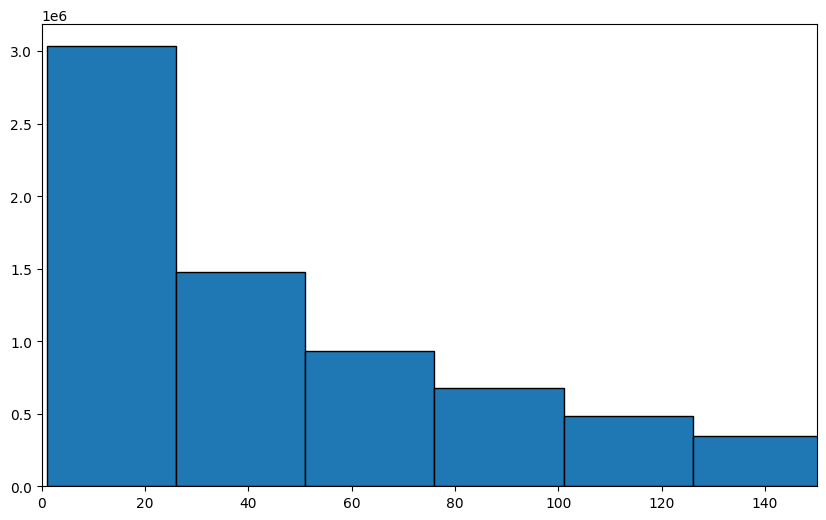

In [ ]:
#Plotting number of data points per group
from matplotlib import pyplot as plt
import numpy as np

lengths=data.Length
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 6))
w = 25
ax.hist(lengths, edgecolor='black', bins=np.arange(min(lengths), max(lengths) + w, w))
plt.xlim(xmin=0, xmax = 150)
# Show plot
plt.show()

In [ ]:
group10=data[(data['Length']<=20)&(data['Length']>0)&(data['Polarity']==0)].sample(225000,ignore_index=True,random_state=6400)
group20=data[(data['Length']<=40)&(data['Length']>20)&(data['Polarity']==0)].sample(225000,ignore_index=True,random_state=6400)
group30=data[(data['Length']<=60)&(data['Length']>40)&(data['Polarity']==0)].sample(225000,ignore_index=True,random_state=6400)
group40=data[(data['Length']<=80)&(data['Length']>60)&(data['Polarity']==0)].sample(225000,ignore_index=True,random_state=6400)
group50=data[(data['Length']<=100)&(data['Length']>80)&(data['Polarity']==0)].sample(225000,ignore_index=True,random_state=6400)
group60=data[(data['Length']>100)&(data['Polarity']==0)].sample(225000,ignore_index=True,random_state=6400)

group11=data[(data['Length']<=20)&(data['Length']>0)&(data['Polarity']==1)].sample(225000,ignore_index=True,random_state=6400)
group21=data[(data['Length']<=40)&(data['Length']>20)&(data['Polarity']==1)].sample(225000,ignore_index=True,random_state=6400)
group31=data[(data['Length']<=60)&(data['Length']>40)&(data['Polarity']==1)].sample(225000,ignore_index=True,random_state=6400)
group41=data[(data['Length']<=80)&(data['Length']>60)&(data['Polarity']==1)].sample(225000,ignore_index=True,random_state=6400)
group51=data[(data['Length']<=100)&(data['Length']>80)&(data['Polarity']==1)].sample(225000,ignore_index=True,random_state=6400)
group61=data[(data['Length']>100)&(data['Polarity']==1)].sample(225000,ignore_index=True,random_state=6400)


In [ ]:
group1=pd.concat([group10,group11],axis=0)
group2=pd.concat([group20,group21],axis=0)
group3=pd.concat([group30,group31],axis=0)
group4=pd.concat([group40,group41],axis=0)
group5=pd.concat([group50,group51],axis=0)
group6=pd.concat([group60,group61],axis=0)

In [ ]:
x1_train,x1_test,y1_train,y1_test=train_test_split(group1['cleaned'],group1['Polarity'],test_size=0.1,random_state=6400)
x2_train,x2_test,y2_train,y2_test=train_test_split(group2['cleaned'],group2['Polarity'],test_size=0.1,random_state=6400)
x3_train,x3_test,y3_train,y3_test=train_test_split(group3['cleaned'],group3['Polarity'],test_size=0.1,random_state=6400)
x4_train,x4_test,y4_train,y4_test=train_test_split(group4['cleaned'],group4['Polarity'],test_size=0.1,random_state=6400)
x5_train,x5_test,y5_train,y5_test=train_test_split(group5['cleaned'],group5['Polarity'],test_size=0.1,random_state=6400)

x_train=pd.concat([x1_train,x2_train,x3_train,x4_train,x5_train],axis=0)
y_train=pd.concat([y1_train,y2_train,y3_train,y4_train,y5_train],axis=0)
x_test=pd.concat([x1_test,x2_test,x3_test,x4_test,x5_test],axis=0)
y_test=pd.concat([y1_test,y2_test,y3_test,y4_test,y5_test],axis=0)

max_len=100
max_word=20000

## Tokenizing words and splitting the data

In [ ]:
max_len  = 100 #Depending on the group
max_word = 20000

# tokenizer = Tokenizer(num_words=20000,filters='"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
# tokenizer.fit_on_texts(x_train)

tokenizer_file = '/content/drive/MyDrive/NLP/tokenizer.pkl'
with open(tokenizer_file, 'rb') as f:
    tokenizer = pickle.load(f)

import keras
from keras.utils import pad_sequences

# convert Train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(x_train)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_len)

# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(x_test)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_len)

In [ ]:
l = [len(i) for i in train_sequences]
l = np.array(l)
print('minimum number of words: {}'.format(l.min()))
print('median number of words: {}'.format(np.median(l)))
print('average number of words: {}'.format(l.mean()))
print('maximum number of words: {}'.format(l.max()))

minimum number of words: 0
median number of words: 47.0
average number of words: 46.91495209876543
maximum number of words: 100


# LSTM Model

## Hyperparameter Tuning

In [ ]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
hyperparameters = {
    'num_lstm_layers': [1, 2, 3],
    'num_lstm_units': [32, 64, 128],
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.2, 0.3, 0.4]
}

param_grid = list(ParameterGrid(hyperparameters))

In [ ]:
def create_model(num_lstm_layers, num_lstm_units, learning_rate, dropout_rate):
    model = Sequential()
    model.add(Embedding(20000, 128, input_length=max_len))
    model.add(LSTM(num_lstm_units, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(Activation('relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [ ]:
# Perform grid search
best_params = None
best_score = 0
for params in param_grid:
    model = create_model(**params)
    model.fit(train_padded, y_train,batch_size=128,epochs=10, validation_data=(test_padded,y_test),callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.00001,patience=10)],steps_per_epoch=2048)
    loss, score = model.evaluate(test_padded, y_test)
    print(f"params: {params}, score: {score}")

    # Save best hyperparameters
    if score > best_score:
        best_score = score
        best_params = params

In [ ]:
print("Best Parameters")
print(best_params)

Best Parameters
{'dropout_rate': 0.3, 'learning_rate': 0.001, 'num_lstm_layers': 2, 'num_lstm_units': 128}


In [ ]:
def lstm_model():
    model = Sequential()
    model.add(Embedding(20000, 128, input_length=max_len))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(Activation('relu'))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(Activation('relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [ ]:
# Train final model on combined training and validation set with best hyperparameters
model = lstm_model()
model.summary()
model.fit(train_padded, y_train ,batch_size=128,epochs=1000, validation_data=(test_padded,y_test),callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.00001,patience=15)],steps_per_epoch=2048)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          2560000   
                                                                 
 lstm (LSTM)                 (None, 100, 128)          131584    
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 activation (Activation)     (None, 100, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 128)          131584    
                                                                 
 dropout_1 (Dropout)         (None, 100, 128)          0         
                                                                 
 activation_1 (Activation)   (None, 100, 128)          0

NameError: ignored

In [ ]:
# Evaluate final model on test set
loss, best_score = model.evaluate(test_padded, y_test)
print(f"Validation accuracy: {best_score}")

6945/6945 [==============================] - 36s 5ms/step - loss: 0.3303 - accuracy: 0.8617
Validation accuracy: 0.8617249131202698


## Saving the model and tokenizer

In [ ]:
# save the model
model.save('LSTM.h5')
# save the tokenizer to a file
tokenizer_file = '/content/drive/MyDrive/NLP/tokenizer.pkl'
with open(tokenizer_file, 'wb') as f:
    pickle.dump(tokenizer, f)

## Load the model and test for each group

In [ ]:
max_len = 100
LSTM = tf.keras.models.load_model('/content/drive/MyDrive/NLP/LSTM.h5')
optimizer = Adam(learning_rate=0.001)
LSTM.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', get_f1, get_recall, get_precision])
LSTM_original = []

In [ ]:
# Group-1

g1_test = tokenizer.texts_to_sequences(x1_test)
g1_padded = sequence.pad_sequences(g1_test, padding='post', maxlen=max_len)
loss, accuracy, f1, recall, precision = LSTM.evaluate(g1_padded, y1_test)
print("Group-1")
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
LSTM_original.append(accuracy)

1407/1407 [==============================] - 13s 6ms/step - loss: 0.2969 - accuracy: 0.8732 - get_f1: 1.7573 - get_recall: 85.5080 - get_precision: 0.8879
Group-1
Loss: 0.29693353176116943
Accuracy: 0.8732087016105652
Recall: 85.50801849365234
Precision: 0.887930154800415
F1-score: 1.7573148012161255


In [ ]:
# Group-2

g2_test = tokenizer.texts_to_sequences(x2_test)
g2_padded = sequence.pad_sequences(g2_test, padding='post', maxlen=max_len)
loss, accuracy, f1, recall, precision = LSTM.evaluate(g2_padded, y2_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
LSTM_original.append(accuracy)

1407/1407 [==============================] - 8s 6ms/step - loss: 0.2565 - accuracy: 0.8898 - get_f1: 1.7922 - get_recall: 86.9666 - get_precision: 0.9055
Loss: 0.25653859972953796
Accuracy: 0.889759361743927
Recall: 86.96662139892578
Precision: 0.9054985642433167
F1-score: 1.7921581268310547


In [ ]:
# Group-3

g3_test = tokenizer.texts_to_sequences(x3_test)
g3_padded = sequence.pad_sequences(g3_test, padding='post', maxlen=max_len)
loss, accuracy, f1, recall, precision = LSTM.evaluate(g3_padded, y3_test)
print("Group-3")
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
LSTM_original.append(accuracy)

1407/1407 [==============================] - 8s 6ms/step - loss: 0.2129 - accuracy: 0.9111 - get_f1: 1.8173 - get_recall: 90.2161 - get_precision: 0.9180
Group-3
Loss: 0.21290765702724457
Accuracy: 0.9111257195472717
Recall: 90.21611022949219
Precision: 0.9179567098617554
F1-score: 1.8173127174377441


In [ ]:
# Group-4

g4_test = tokenizer.texts_to_sequences(x4_test)
g4_padded = sequence.pad_sequences(g4_test, padding='post', maxlen=max_len)
loss, accuracy, f1, recall, precision = LSTM.evaluate(g4_padded, y4_test)
print("Group-4")
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
LSTM_original.append(accuracy)

1407/1407 [==============================] - 8s 6ms/step - loss: 0.2233 - accuracy: 0.9032 - get_f1: 1.8017 - get_recall: 89.3305 - get_precision: 0.9101
Group-4
Loss: 0.22333884239196777
Accuracy: 0.9032427668571472
Recall: 89.3305435180664
Precision: 0.9101049900054932
F1-score: 1.8017452955245972


In [ ]:
# Group-5

g5_test = tokenizer.texts_to_sequences(x5_test)
g5_padded = sequence.pad_sequences(g5_test, padding='post', maxlen=max_len)
loss, accuracy, f1, recall, precision = LSTM.evaluate(g5_padded, y5_test)
print("Group-5")
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
LSTM_original.append(accuracy)

1407/1407 [==============================] - 8s 5ms/step - loss: 0.2307 - accuracy: 0.8986 - get_f1: 1.7925 - get_recall: 88.8588 - get_precision: 0.9054
Group-5
Loss: 0.23070888221263885
Accuracy: 0.8985908627510071
Recall: 88.85875701904297
Precision: 0.9054311513900757
F1-score: 1.7924904823303223


# LSTM Model - With Attention

## Hyperparameter Tuning

In [ ]:
hyperparameters = {
    'num_lstm_layers': [1, 2, 3],
    'num_lstm_units': [32, 64, 128],
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.2, 0.3, 0.4]
}

param_grid = list(ParameterGrid(hyperparameters))

NameError: ignored

In [ ]:
class attention(tf.keras.layers.Layer):
  def __init__(self, **kwargs):
      super(attention, self).__init__(**kwargs)

  def build(self, input_shape):
    self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
    self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")
    super(attention, self).build(input_shape)

  def call(self, x):
    et = tf.keras.backend.dot(x, self.W) + self.b
    at = tf.keras.backend.softmax(et, axis=1)
    output = x * at
    return tf.keras.backend.sum(output, axis=1)

  def compute_output_shape(self,input_shape):
    return (input_shape[0],input_shape[-1])

  def get_config(self):
    return super(attention,self).get_config()

In [ ]:
def create_model(max_len, num_lstm_layers, num_lstm_units, num_dense_units, learning_rate, dropout_rate):
    model = Sequential()
    model.add(Embedding(20000, 128, input_length=max_len))
    for i in range(num_lstm_layers):
        model.add(LSTM(num_lstm_units, return_sequences=True)))
        model.add(Dropout(dropout_rate))
    model.add(attention(max_len))
    model.add(Dense(num_dense_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [ ]:
# Perform grid search
best_params = None
best_score = 0
for params in param_grid:
    model = create_model(**params)
    model.fit(train_padded, y_train,batch_size=128,epochs=10, validation_data=(test_padded,y_test),callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.00001,patience=10)],steps_per_epoch=2048)
    loss, score = model.evaluate(test_padded, y_test)
    print(f"params: {params}, score: {score}")

    # Save best hyperparameters
    if score > best_score:
        best_score = score
        best_params = params

In [ ]:
print("Best Parameters")
print(best_params)

In [ ]:
def lstm_attention_model():
  inputs = Input(shape=(max_len,), dtype="int32")
  x = Embedding(20000, 128, input_length=max_len)(inputs)

  layer1 = LSTM(128, return_sequences=True)(x)
  droupout1 = Dropout(0.3)(layer1)
  act1 = Activation('relu')(droupout1)
  layer2 = LSTM(128, return_sequences=True)(act1)
  dropout2 = Dropout(0.3)(layer2)

  att_in = attention()(dropout2)
  output1 = Dense(128, activation='relu')(att_in)
  dropout3 = Dropout(0.2)(output1)
  output2 = Dense(1, activation='sigmoid')(dropout3)

  model = tf.keras.Model(inputs, output2)
  optimizer = Adam(learning_rate=0.001)
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

In [ ]:
model = lstm_attention_model()
model.summary()
model.fit(train_padded, y_train ,batch_size=128,epochs=1000, validation_data=(test_padded,y_test),callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.00001,patience=15)],steps_per_epoch=2048)



In [ ]:
# Evaluate final model on test set
loss, best_score = model.evaluate(test_padded, y_test)
print(f"Validation accuracy: {best_score}")

## Saving the model

In [ ]:
# save the model
model.save('LSTM_attention.h5')

## Load the model and test for each group

In [ ]:
max_len = 100
LSTM_att = load_model('/content/drive/MyDrive/NLP/LSTM_attention.h5', custom_objects={"attention": attention})
optimizer = Adam(learning_rate=0.001)
LSTM_att.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', get_f1, get_recall, get_precision])
LSTM_Att = []

In [ ]:
# Group-1

g1_test = tokenizer.texts_to_sequences(x1_test)
g1_padded = sequence.pad_sequences(g1_test, padding='post', maxlen=max_len)
loss, accuracy, f1, recall, precision = LSTM_att.evaluate(g1_padded, y1_test)
print("Group-1")
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
LSTM_Att.append(accuracy)

1407/1407 [==============================] - 9s 5ms/step - loss: 0.2937 - accuracy: 0.8747 - get_f1: 0.0168 - get_recall: 0.0085 - get_precision: 0.8993
Group-1
Loss: 0.29368478059768677
Accuracy: 0.8747110962867737
Recall: 0.008462594822049141
Precision: 0.8992683291435242
F1-score: 0.016764624044299126


In [ ]:
# Group-2

g2_test = tokenizer.texts_to_sequences(x2_test)
g2_padded = sequence.pad_sequences(g2_test, padding='post', maxlen=max_len)
loss, accuracy, f1, recall, precision = LSTM_att.evaluate(g2_padded, y2_test)
print("Group-2")
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
LSTM_Att.append(accuracy)

1407/1407 [==============================] - 7s 5ms/step - loss: 0.2395 - accuracy: 0.9010 - get_f1: 0.0176 - get_recall: 0.0089 - get_precision: 0.9137
Group-2
Loss: 0.23947228491306305
Accuracy: 0.9009777903556824
Recall: 0.008875997737050056
Precision: 0.9137227535247803
F1-score: 0.01757892780005932


In [ ]:
# Group-3

g3_test = tokenizer.texts_to_sequences(x3_test)
g3_padded = sequence.pad_sequences(g3_test, padding='post', maxlen=max_len)
loss, accuracy, f1, recall, precision = LSTM_att.evaluate(g3_padded, y3_test)
print("Group-3")
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
LSTM_Att.append(accuracy)

1407/1407 [==============================] - 7s 5ms/step - loss: 0.1783 - accuracy: 0.9333 - get_f1: 0.0186 - get_recall: 0.0094 - get_precision: 0.9294
Group-3
Loss: 0.17825758457183838
Accuracy: 0.9333111047744751
Recall: 0.009391783736646175
Precision: 0.9294322729110718
F1-score: 0.018593842163681984


In [ ]:
# Group-4

g4_test = tokenizer.texts_to_sequences(x4_test)
g4_padded = sequence.pad_sequences(g4_test, padding='post', maxlen=max_len)
loss, accuracy, f1, recall, precision = LSTM_att.evaluate(g4_padded, y4_test)
print("Group-4")
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
LSTM_Att.append(accuracy)

1407/1407 [==============================] - 7s 5ms/step - loss: 0.1733 - accuracy: 0.9354 - get_f1: 0.0187 - get_recall: 0.0094 - get_precision: 0.9296
Group-4
Loss: 0.1733327955007553
Accuracy: 0.9354000091552734
Recall: 0.009432525373995304
Precision: 0.9296061396598816
F1-score: 0.018673818558454514


In [ ]:
# Group-5

g5_test = tokenizer.texts_to_sequences(x5_test)
g5_padded = sequence.pad_sequences(g5_test, padding='post', maxlen=max_len)
loss, accuracy, f1, recall, precision = LSTM_att.evaluate(g5_padded, y5_test)
print("Group-5")
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
LSTM_Att.append(accuracy)

1407/1407 [==============================] - 7s 5ms/step - loss: 0.1725 - accuracy: 0.9373 - get_f1: 0.0187 - get_recall: 0.0095 - get_precision: 0.9320
Group-5
Loss: 0.17248670756816864
Accuracy: 0.9373111128807068
Recall: 0.009453484788537025
Precision: 0.9320306181907654
F1-score: 0.018715348094701767


# Bi-LSTM

## Hyperparameter Tuning

In [ ]:
hyperparameters = {
    'num_lstm_layers': [1, 2, 3],
    'num_lstm_units': [32, 64, 128],
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.2, 0.3, 0.4]
}

param_grid = list(ParameterGrid(hyperparameters))

In [ ]:
def create_model(num_lstm_layers, num_lstm_units, learning_rate, dropout_rate):
    model = Sequential()
    model.add(Embedding(20000, 128, input_length=max_len))
    model.add(Bidirectional(LSTM(num_lstm_units, return_sequences=True)))
    model.add(Dropout(dropout_rate))
    model.add(Activation('relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [ ]:
# Perform grid search
best_params = None
best_score = 0
for params in param_grid:
    model = create_model(**params)
    model.fit(train_padded, y_train,batch_size=128,epochs=10, validation_data=(test_padded,y_test),callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.00001,patience=10)],steps_per_epoch=2048)
    loss, score = model.evaluate(test_padded, y_test)
    print(f"params: {params}, score: {score}")

    # Save best hyperparameters
    if score > best_score:
        best_score = score
        best_params = params

In [ ]:
print("Best Parameters")
print(best_params)

In [ ]:
def bi_lstm_model():
    model = Sequential()
    model.add(Embedding(20000, 128, input_length=max_len))

    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(Dropout(0.3))
    model.add(Activation('relu'))

    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(Dropout(0.3))
    model.add(Activation('relu'))

    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [ ]:
# Train final model on combined training and validation set with best hyperparameters
final_model = bi_lstm_model()
final_model.summary()
final_model.fit(train_padded, y_train ,batch_size=128,epochs=1000, validation_data=(test_padded,y_test),callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.00001,patience=15)],steps_per_epoch=2048)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 128)          2560000   
                                                                 
 bidirectional_4 (Bidirectio  (None, 100, 256)         263168    
 nal)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 100, 256)          0         
                                                                 
 activation_10 (Activation)  (None, 100, 256)          0         
                                                                 
 bidirectional_5 (Bidirectio  (None, 100, 256)         394240    
 nal)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 100, 256)         

In [ ]:
# Evaluate final model on test set
loss, best_score = model.evaluate(test_padded, y_test)
print(f"Validation accuracy: {best_score}")

7813/7813 [==============================] - 67s 9ms/step - loss: 0.2043 - accuracy: 0.9165
Validation accuracy: 0.9165172576904297


## Save the model

In [ ]:
# save the model
model.save('Bi-LSTM.h5')

## Load the model and test for each group

In [ ]:
max_len = 100
Bi_LSTM = load_model('/content/drive/MyDrive/NLP/Bi-LSTM.h5')
optimizer = Adam(learning_rate=0.001)
Bi_LSTM.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', get_f1, get_recall, get_precision])
bi_lstm = []

In [ ]:
# Group-1

g1_test = tokenizer.texts_to_sequences(x1_test)
g1_padded = sequence.pad_sequences(g1_test, padding='post', maxlen=max_len)
loss, accuracy, f1, recall, precision = Bi_LSTM.evaluate(g1_padded, y1_test)
print("Group-1")
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
bi_lstm.append(accuracy)

1407/1407 [==============================] - 15s 9ms/step - loss: 0.2867 - accuracy: 0.8764 - get_f1: 1.7509 - get_recall: 86.7592 - get_precision: 0.8845
Group-1
Loss: 0.28673017024993896
Accuracy: 0.8763548731803894
Recall: 86.75917053222656
Precision: 0.8844908475875854
F1-score: 1.7508546113967896


In [ ]:
# Group-2

g2_test = tokenizer.texts_to_sequences(x2_test)
g2_padded = sequence.pad_sequences(g2_test, padding='post', maxlen=max_len)
loss, accuracy, f1, recall, precision = Bi_LSTM.evaluate(g2_padded, y2_test)
print("Group-2")
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
bi_lstm.append(accuracy)

1407/1407 [==============================] - 13s 9ms/step - loss: 0.2323 - accuracy: 0.9011 - get_f1: 1.7991 - get_recall: 89.2928 - get_precision: 0.9088
Group-2
Loss: 0.23233242332935333
Accuracy: 0.9010528922080994
Recall: 89.29283905029297
Precision: 0.9088422656059265
F1-score: 1.799122929573059


In [ ]:
# Group-3

g3_test = tokenizer.texts_to_sequences(x3_test)
g3_padded = sequence.pad_sequences(g3_test, padding='post', maxlen=max_len)
loss, accuracy, f1, recall, precision = Bi_LSTM.evaluate(g3_padded, y3_test)
print("Group-3")
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
bi_lstm.append(accuracy)

1407/1407 [==============================] - 12s 9ms/step - loss: 0.1725 - accuracy: 0.9336 - get_f1: 1.8485 - get_recall: 93.4625 - get_precision: 0.9336
Group-3
Loss: 0.17250226438045502
Accuracy: 0.9336283206939697
Recall: 93.46250915527344
Precision: 0.9335668683052063
F1-score: 1.8485151529312134


In [ ]:
# Group-4

g4_test = tokenizer.texts_to_sequences(x4_test)
g4_padded = sequence.pad_sequences(g4_test, padding='post', maxlen=max_len)
loss, accuracy, f1, recall, precision = Bi_LSTM.evaluate(g4_padded, y4_test)
print("Group-4")
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
bi_lstm.append(accuracy)

1407/1407 [==============================] - 13s 9ms/step - loss: 0.1654 - accuracy: 0.9349 - get_f1: 1.8545 - get_recall: 93.3763 - get_precision: 0.9366
Group-4
Loss: 0.16543422639369965
Accuracy: 0.9349337816238403
Recall: 93.37626647949219
Precision: 0.9366396069526672
F1-score: 1.854522943496704


In [ ]:
# Group-5

g5_test = tokenizer.texts_to_sequences(x5_test)
g5_padded = sequence.pad_sequences(g5_test, padding='post', maxlen=max_len)
loss, accuracy, f1, recall, precision = Bi_LSTM.evaluate(g5_padded, y5_test)
print("Group-5")
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
bi_lstm.append(accuracy)

1407/1407 [==============================] - 12s 9ms/step - loss: 0.1641 - accuracy: 0.9361 - get_f1: 1.8601 - get_recall: 93.3668 - get_precision: 0.9395
Group-5
Loss: 0.16411162912845612
Accuracy: 0.9360813498497009
Recall: 93.36680603027344
Precision: 0.9394614696502686
F1-score: 1.860052466392517


# Bi-LSTM with Attention

## Hyperparameter Tuning

In [ ]:
hyperparameters = {
    'num_lstm_layers': [1, 2, 3],
    'num_lstm_units': [32, 64, 128],
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.2, 0.3, 0.4]
}

param_grid = list(ParameterGrid(hyperparameters))

In [ ]:
class Attention(tf.keras.layers.Layer):
  def __init__(self, units):
    super(Attention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self,  features, hidden, mask=None):
    hidden_with_time_axis = tf.expand_dims(hidden, 1)
    score = tf.nn.tanh(self.W1(features) + self.W2(hidden_with_time_axis))

    attention_weights = tf.nn.softmax(self.V(score), axis=1)
    if mask is not None:
      attention_weights *= mask
      attention_weights = tf.nn.softmax(attention_weights, axis=1)
    context_vector = attention_weights * features
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

  def compute_output_shape(self,input_shape):
    return (input_shape[0],input_shape[-1])

  def get_config(self):
    return super(Attention,self).get_config()

In [ ]:
def create_model(max_len, num_lstm_layers, num_lstm_units, num_dense_units, learning_rate, dropout_rate):
    model = Sequential()
    model.add(Embedding(20000, 128, input_length=max_len))
    for i in range(num_lstm_layers):
        model.add(Bidirectional(LSTM(num_lstm_units, return_sequences=True)))
        model.add(Dropout(dropout_rate))
    model.add(attention(max_len))
    model.add(Dense(num_dense_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [ ]:
# Perform grid search
best_params = None
best_score = 0
for params in param_grid:
    model = create_model(**params)
    model.fit(train_padded, y_train,batch_size=128,epochs=10, validation_data=(test_padded,y_test),callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.00001,patience=10)],steps_per_epoch=2048)
    loss, score = model.evaluate(test_padded, y_test)
    print(f"params: {params}, score: {score}")

    # Save best hyperparameters
    if score > best_score:
        best_score = score
        best_params = params

In [ ]:
print("Best Parameters")
print(best_params)

In [ ]:
def bi_lstm_attention_model():
  sequence_input = Input(shape=(max_len,), dtype="int32")
  embedded_sequences = Embedding(max_word, 128)(sequence_input)

  # First Bidirectional LSTM layer
  lstm_1 = Bidirectional(LSTM(128, return_sequences=True, return_state=True), name="bi_lstm_1")(embedded_sequences)
  (forward_h1, forward_c1, backward_h1, backward_c1) = lstm_1[1:]

  # Second Bidirectional LSTM layer
  lstm_2 = Bidirectional(LSTM(128, return_sequences=True, return_state=True), name="bi_lstm_2")(lstm_1[0])
  (forward_h2, forward_c2, backward_h2, backward_c2) = lstm_2[1:]

  # Concatenate forward and backward hidden states
  state_h = Concatenate()([forward_h2, backward_h2])
  state_c = Concatenate()([forward_c2, backward_c2])

  # Attention mechanism
  context_vector, attention_weights = Attention(128)(lstm_2[0], state_h)

  # Dense layers
  dense1 = Dense(128, activation="relu")(context_vector)
  dropout = Dropout(0.2)(dense1)
  output = Dense(1, activation="sigmoid")(dropout)

  model = tf.keras.Model(inputs=sequence_input, outputs=output)
  optimizer = Adam(learning_rate=0.001)
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', get_f1, get_recall, get_precision])
  return model

In [ ]:
model = bi_lstm_attention_model()
model.summary()
model.fit(train_padded, y_train ,batch_size=128,epochs=1000, validation_data=(test_padded,y_test),callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.00001,patience=15)],steps_per_epoch=2048)



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 100, 128)     2560000     ['input_2[0][0]']                
                                                                                                  
 bi_lstm_1 (Bidirectional)      [(None, 100, 256),   263168      ['embedding_1[0][0]']            
                                 (None, 128),                                                     
                                 (None, 128),                                                     
                                 (None, 128),                                               

In [ ]:
# Evaluate final model on test set
loss, best_score, f1, recall, precision= model.evaluate(test_padded, y_test)
print(f"Validation accuracy: {best_score}")

7032/7032 [==============================] - 68s 10ms/step - loss: 0.2089 - accuracy: 0.9188 - get_f1: 0.9168 - get_recall: 0.9188 - get_precision: 0.9197
Validation accuracy: 0.9188133478164673


## Saving the model

In [ ]:
model.save_weights('Bi-LSTM_att_weights.h5')

## Load the model and test for each group

In [ ]:
Bi_LSTM_Att = []
Bi_LSTM_att = bi_lstm_attention_model()
Bi_LSTM_att.load_weights("/content/drive/MyDrive/NLP/Bi-LSTM_att_weights.h5")

TypeError: ignored

In [ ]:
# Group-1

g1_test = tokenizer.texts_to_sequences(x1_test)
g1_padded = sequence.pad_sequences(g1_test, padding='post', maxlen=max_len)
loss, accuracy, f1, recall, precision = Bi_LSTM_att.evaluate(g1_padded, y1_test)
print("Group-1")
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
Bi_LSTM_Att.append(accuracy)

NameError: ignored

In [ ]:
# Group-2

g2_test = tokenizer.texts_to_sequences(x2_test)
g2_padded = sequence.pad_sequences(g2_test, padding='post', maxlen=max_len)
loss, accuracy, f1, recall, precision = Bi_LSTM_att.evaluate(g2_padded, y2_test)
print("Group-2")
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
Bi_LSTM_Att.append(accuracy)

In [ ]:
# Group-3

g3_test = tokenizer.texts_to_sequences(x3_test)
g3_padded = sequence.pad_sequences(g3_test, padding='post', maxlen=max_len)
loss, accuracy, f1, recall, precision = Bi_LSTM_att.evaluate(g3_padded, y3_test)
print("Group-3")
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
Bi_LSTM_Att.append(accuracy)

In [ ]:
# Group-4

g4_test = tokenizer.texts_to_sequences(x4_test)
g4_padded = sequence.pad_sequences(g4_test, padding='post', maxlen=max_len)
loss, accuracy, f1, recall, precision = Bi_LSTM_att.evaluate(g4_padded, y4_test)
print("Group-4")
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
Bi_LSTM_Att.append(accuracy)

In [ ]:
# Group-5

g5_test = tokenizer.texts_to_sequences(x5_test)
g5_padded = sequence.pad_sequences(g5_test, padding='post', maxlen=max_len)
loss, accuracy, f1, recall, precision = Bi_LSTM_att.evaluate(g5_padded, y5_test)
print("Group-5")
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")
Bi_LSTM_Att.append(accuracy)

# Transformers

In [ ]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads,
                                             key_dim=embed_dim)
        self.ffn = keras.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(embed_dim),
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)  # self-attention layer
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)  # layer norm
        ffn_output = self.ffn(out1)  #feed-forward layer
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)  # layer norm

class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size,
                                          output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

NameError: ignored

In [ ]:
def create_model():
  embed_dim = 128  # Embedding size for each token
  num_heads = 8  # Number of attention heads
  ff_dim = 8  # Hidden layer size in feed forward network inside transformer

  ## Using Sequential API
  model = keras.Sequential()
  model.add(layers.Input(shape=(max_len, )))
  model.add(TokenAndPositionEmbedding(max_len, 20000, embed_dim))
  model.add(TransformerBlock(embed_dim, num_heads, ff_dim))
  model.add(layers.GlobalAveragePooling1D())
  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(ff_dim, activation='relu'))
  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(1, activation='sigmoid'))

  return model

In [ ]:
trans = create_model()
trans.summary()
trans.compile(loss='binary_crossentropy',optimizer=Adamax(.01),metrics=['accuracy'])


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 token_and_position_embeddin  (None, 100, 128)         2572800   
 g_8 (TokenAndPositionEmbedd                                     
 ing)                                                            
                                                                 
 transformer_block_8 (Transf  (None, 100, 128)         530184    
 ormerBlock)                                                     
                                                                 
 global_average_pooling1d_8   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_37 (Dropout)        (None, 128)               0         
                                                                 
 dense_40 (Dense)            (None, 8)               

In [ ]:
history=trans.fit(train_padded,y_train,batch_size=128,epochs=50,validation_data=(test_padded,y_test),callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.00001,patience=5)],steps_per_epoch=2048)

NameError: ignored

## Load the model and test for each group

In [ ]:
transformer = []

In [ ]:
transformer_old = []

In [ ]:
# Group-1

g1_test = tokenizer.texts_to_sequences(x1_test)
g1_padded = sequence.pad_sequences(g1_test, padding='post', maxlen=max_len)
loss, accuracy = trans.evaluate(g1_padded, y1_test)
print("Group-1")
print(f"Loss(%): {loss*100}")
print(f"Accuracy(%): {accuracy*100}")
transformer_old.append(accuracy)

625/625 [==============================] - 4s 6ms/step - loss: 0.4127 - accuracy: 0.8094
Group-1
Loss(%): 41.27286076545715
Accuracy(%): 80.94000220298767


In [ ]:
# Group-2

g2_test = tokenizer.texts_to_sequences(x2_test)
g2_padded = sequence.pad_sequences(g2_test, padding='post', maxlen=max_len)
loss, accuracy = trans.evaluate(g2_padded, y2_test)
print("Group-2")
print(f"Loss(%): {loss*100}")
print(f"Accuracy(%): {accuracy*100}")
transformer_old.append(accuracy)

625/625 [==============================] - 4s 6ms/step - loss: 0.3366 - accuracy: 0.8482
Group-2
Loss(%): 33.65573585033417
Accuracy(%): 84.82000231742859


In [ ]:
# Group-3

g3_test = tokenizer.texts_to_sequences(x3_test)
g3_padded = sequence.pad_sequences(g3_test, padding='post', maxlen=max_len)
loss, accuracy = trans.evaluate(g3_padded, y3_test)
print("Group-3")
print(f"Loss(%): {loss*100}")
print(f"Accuracy(%): {accuracy*100}")
transformer_old.append(accuracy)

625/625 [==============================] - 4s 6ms/step - loss: 0.2534 - accuracy: 0.8957
Group-3
Loss(%): 25.343382358551025
Accuracy(%): 89.56500291824341


In [ ]:
# Group-4

g4_test = tokenizer.texts_to_sequences(x4_test)
g4_padded = sequence.pad_sequences(g4_test, padding='post', maxlen=max_len)
loss, accuracy = trans.evaluate(g4_padded, y4_test)
print("Group-4")
print(f"Loss(%): {loss*100}")
print(f"Accuracy(%): {accuracy*100}")
transformer_old.append(accuracy)

625/625 [==============================] - 4s 6ms/step - loss: 0.2633 - accuracy: 0.8911
Group-4
Loss(%): 26.3296902179718
Accuracy(%): 89.11499977111816


In [ ]:
# Group-5

g5_test = tokenizer.texts_to_sequences(x5_test)
g5_padded = sequence.pad_sequences(g5_test, padding='post', maxlen=max_len)
loss, accuracy = trans.evaluate(g5_padded, y5_test)
print("Group-5")
print(f"Loss(%): {loss*100}")
print(f"Accuracy(%): {accuracy*100}")
transformer_old.append(accuracy)

625/625 [==============================] - 4s 6ms/step - loss: 0.2732 - accuracy: 0.8874
Group-5
Loss(%): 27.32294797897339
Accuracy(%): 88.74499797821045


# Graphs

In [ ]:
LSTM_original = [0.8732087016105652,
 0.889759361743927,
 0.9111257195472717,
 0.9032427668571472,
 0.8985908627510071]

In [ ]:
LSTM_Att = [0.8747110962867737,
 0.9009777903556824,
 0.9333111047744751,
 0.9354000091552734,
 0.9373111128807068]

In [ ]:
bi_lstm = [0.8763548731803894,
 0.9010528922080994,
 0.9336283206939697,
 0.9349337816238403,
 0.9360813498497009]

In [ ]:
Bi_LSTM_Att = [0.8769333362579346,
 0.9040666818618774,
 0.9352889060974121,
 0.9390666484832764,
 0.9387111067771912]

In [ ]:
transformer = [0.824999, 0.8241, 0.836799, 0.829649, 0.8226]

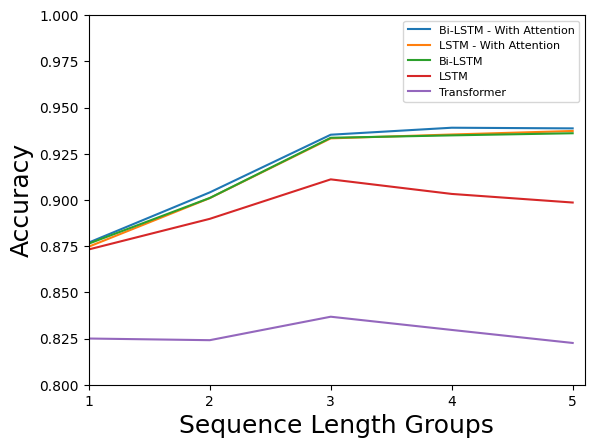

In [ ]:
import matplotlib.pyplot as plt
plt.rc('axes', titlesize=18, labelsize=18)
plt.rc('legend', fontsize=8)
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.plot([1, 2, 3, 4, 5], Bi_LSTM_Att, label = 'Bi-LSTM - With Attention')
plt.plot([1, 2, 3, 4, 5], LSTM_Att, label = 'LSTM - With Attention')
plt.plot([1, 2, 3, 4, 5], bi_lstm, label = 'Bi-LSTM')
plt.plot([1, 2, 3, 4, 5], LSTM_original[0:5], label = 'LSTM')
plt.plot([1, 2, 3, 4, 5], transformer, label = 'Transformer')
plt.ylabel("Accuracy")
plt.xlabel("Sequence Length Groups")
plt.xticks(np.arange(0, 5.1, 1.0))
plt.xlim(1,5.1)
plt.ylim(0.8, 1)
plt.legend()

# Group - 1 Calculations

In [ ]:
import tensorflow.keras as k
from tensorflow.keras import backend as K

In [ ]:

import tensorflow.keras as k
from tensorflow.keras import backend as K
"""
 It adds f1 score as a metric to the compiled model and compiles the model with the input weight
"""

def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

def get_recall(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return recall

def get_precision(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return precision